In [156]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import rc
rc("animation", html="jshtml")
rc("figure",figsize=(10,4),dpi=120)

# Método de Euler simple

Se tiene el sistema:
$$
\frac{dy}{dt} = F(t,y)
$$

Aproximamos con diferencias finitas:

$$
\frac{dy}{dt} = F(t,y) \approx \frac{y(t+dt)-y(t)}{dt} \qquad \to \qquad  F(t_i,y_i)\approx \frac{y_{i+1}-y_{i}}{dt}
$$

Entonces
$$
t_{i+1} = y_{i} + F(t_i,y_i) dt 
$$

In [158]:
def F(t,y,alpha): 
    """Sistema de decaimiento radioactivo. Se pueden solucionar varios sistemas independientes a la vez
    si `y` y `alpha` son arrays."""
    return -alpha * y

In [159]:
ts = np.linspace(0,100)
dt = ts[1]-ts[0]
ys = np.zeros( (len(ts),2) ) 
ys[0] = [100,40]
α = np.array([0.05,0.01])

In [161]:
for i in range(1,len(ys)):
    ys[i] = ys[i-1] + dt * F(ts[i-1],ys[i-1],α)

Text(0, 0.5, 'Cantidad')

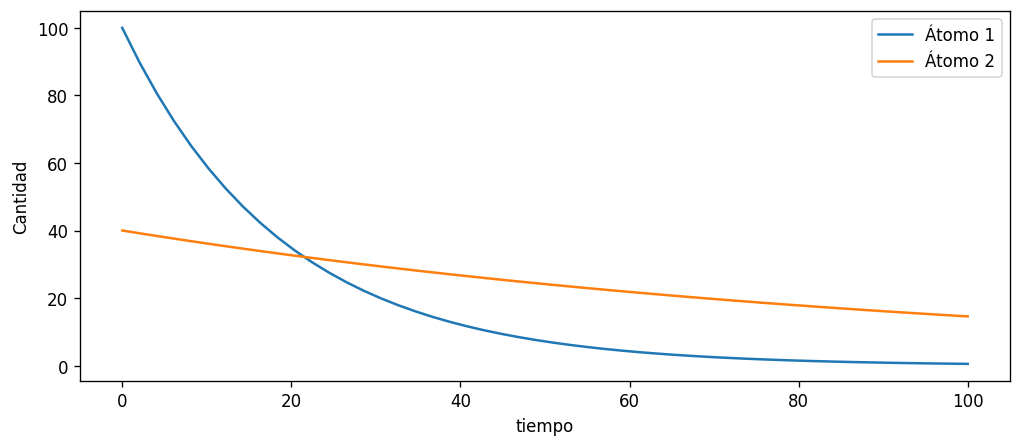

In [162]:
plt.plot(ts,ys[:,0],label="Átomo 1")
plt.plot(ts,ys[:,1],label="Átomo 2")
plt.legend()
plt.xlabel("tiempo")
plt.ylabel("Cantidad")

## Ejemplo oscilador armónico

In [163]:
def system(t,y,omega_0):
    x,v = y
    return np.array([v, -omega_0**2*x])

In [164]:
ts = np.linspace(0,20,1000) 
dt = ts[1]-ts[0]
ys = np.zeros( (len(ts),2) )
ys[0] = [1,0]
ω_0 = 1.4
b = 10.2

In [165]:
for i in range(1,len(ys)):
    ys[i] = ys[i-1] + dt * system(ts[i-1],ys[i-1],ω_0)

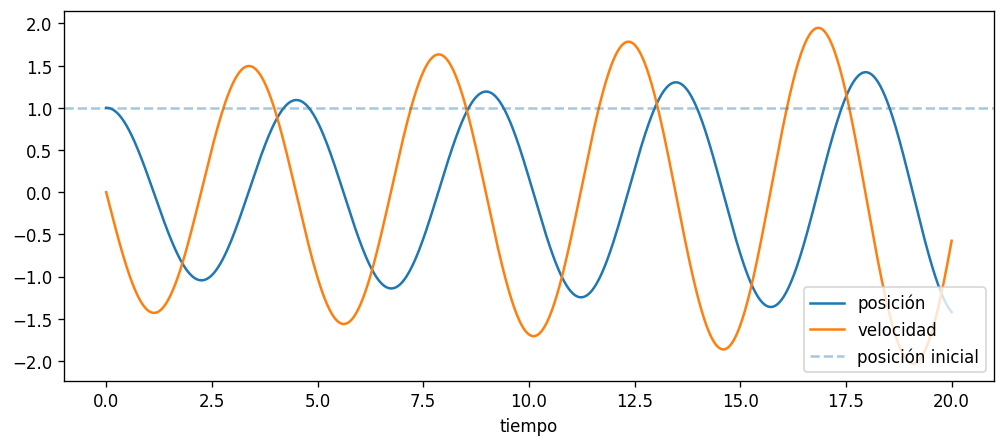

In [201]:
plt.plot(ts,ys[:,0],"-",label="posición")
plt.plot(ts,ys[:,1],"-",label="velocidad")
plt.axhline(ys[0,0],ls="--",alpha=0.4,label="posición inicial")
plt.xlabel("tiempo")
plt.legend(loc=4)

$$
E = \frac{m v^2}{2} + \frac{k x^2}{2}
\qquad \to \qquad 
\frac{2E}{m} = v^2 + \omega_0^2 x^2
$$

Text(0.5, 0, 'Tiempo')

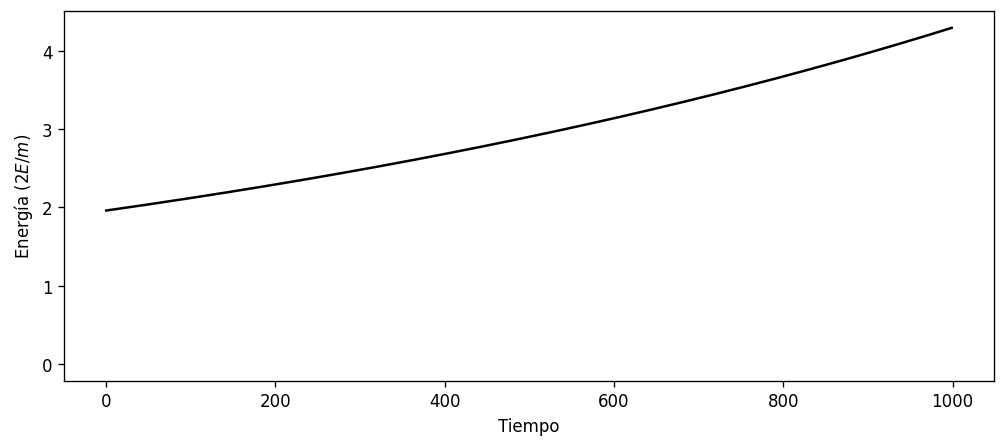

In [171]:
energy = ys[:,1]**2+ω_0**2*ys[:,0]**2
plt.plot(energy,c='k')
plt.plot(0,0)
plt.ylabel("Energía ($2E/m$)")
plt.xlabel("Tiempo")

# Euler-Cromer

Para solucionar el problema de la no conservación de la energía podemos usar en el cálculo de la nueva posición la información obtenida al resolver primero la velocidad.

Antes:

$$
  v_{n+1} = v_n - \omega^2\,x_n\,\Delta t 
\qquad 
  x_{n+1} = x_n + v_{n} \,\Delta t.
$$


Después

$$
  v_{n+1} = v_n - \omega^2\,x_n\,\Delta t 
\qquad 
  x_{n+1} = x_n + v_{n{\color{Red}+1}} \,\Delta t.
$$

De forma explícita se puede escribir como

$$
\begin{bmatrix} x_{n+1} \\v_{n+1}\end{bmatrix} = 
\begin{bmatrix} 
1-\omega^2 \Delta t^2 &  \Delta t \\ 
-\omega^2 \Delta t & 1 
\end{bmatrix} \begin{bmatrix} x_{n} \\ v_{n} \end{bmatrix}
$$

que tiene determinante 1, por lo que debería conservar el área en el diagrama $(x,v)$, que está relacionada con la energía.

In [172]:
ts2 = np.linspace(0,20,1000)
dt = ts2[1]-ts2[0]

xs = np.zeros(len(ts2))
vs = np.zeros(len(ts2))

xs[0] = 1.
ω_0 = 1.4


for i in range(1,len(ts2)):
    vs[i] = vs[i-1] - ω_0**2 * xs[i-1] * dt
    xs[i] = xs[i-1] + dt * vs[i]

# el orden no importa siempre que se use la nueva información
#for i in range(1,len(ts2)):
#    xs[i] = xs[i-1] + dt * vs[i-1]
#    vs[i] = vs[i-1] - ω_0**2 * xs[i] * dt

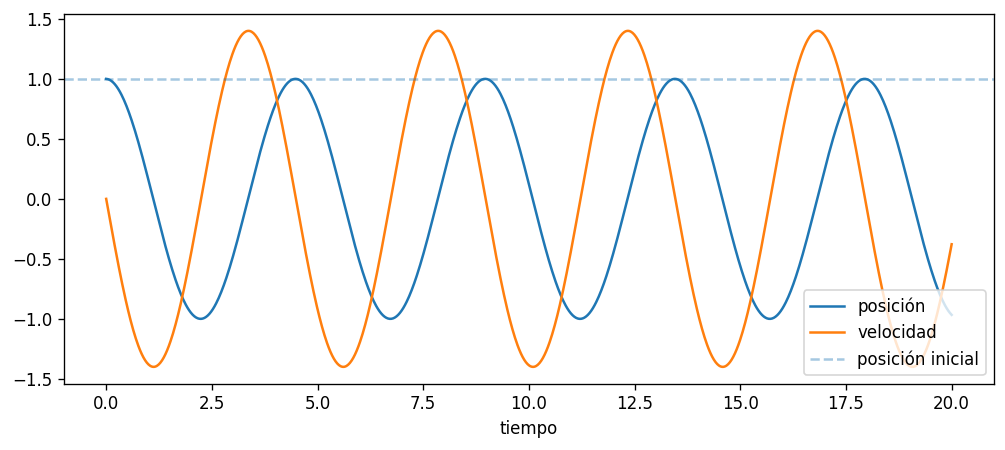

In [200]:
plt.plot(ts2,xs,"-",label="posición")
plt.plot(ts2,vs,"-",label="velocidad")
plt.axhline(xs[0],ls="--",alpha=0.4,label="posición inicial")
plt.xlabel("tiempo")
plt.legend(loc=4)

Text(0.5, 0, 'Tiempo')

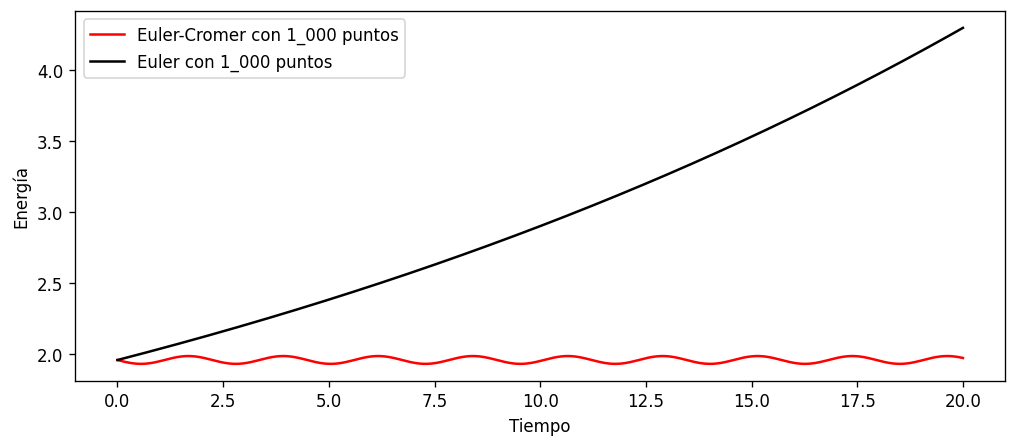

In [176]:
plt.plot(ts2,vs**2+ω_0**2*xs**2,label=f"Euler-Cromer con {len(ts):_} puntos",c='r')
plt.plot(ts,ys[:,1]**2+ω_0**2*ys[:,0]**2,label=f"Euler con {len(ts2):_} puntos",c='k')
plt.legend()
plt.ylabel("Energía")
plt.xlabel("Tiempo")

# Scipy solve_ivp

Los métodos de orden alto, como Runge-Kutta, BDF y similares, ayudan a conservar la energía. Vale la pena aprender a utilizar las herramientas de scipy.

In [182]:
from scipy.integrate import solve_ivp

In [183]:
def system(t,y,omega_0):
    x,v = y
    return np.array([v, -omega_0**2*x])

In [184]:
method = "Radau" # pueden intentar con RK45, BDF, o LSODA
y0 = np.array([1.,0.])
args = [ω_0]
t_span = (0,20)

sol = solve_ivp(
    fun=system,
    y0=y0,
    t_span=t_span,
    args=args,
    method=method,
    dense_output=True # esto activa la interpolación
)

In [185]:
t_dense = np.linspace(t_span[0],t_span[1],1000) # tiempos para evaluar la interpolación de la solución, puede ser mucho más fino que sol.t
x_dense, v_dense = sol.sol(t_dense)

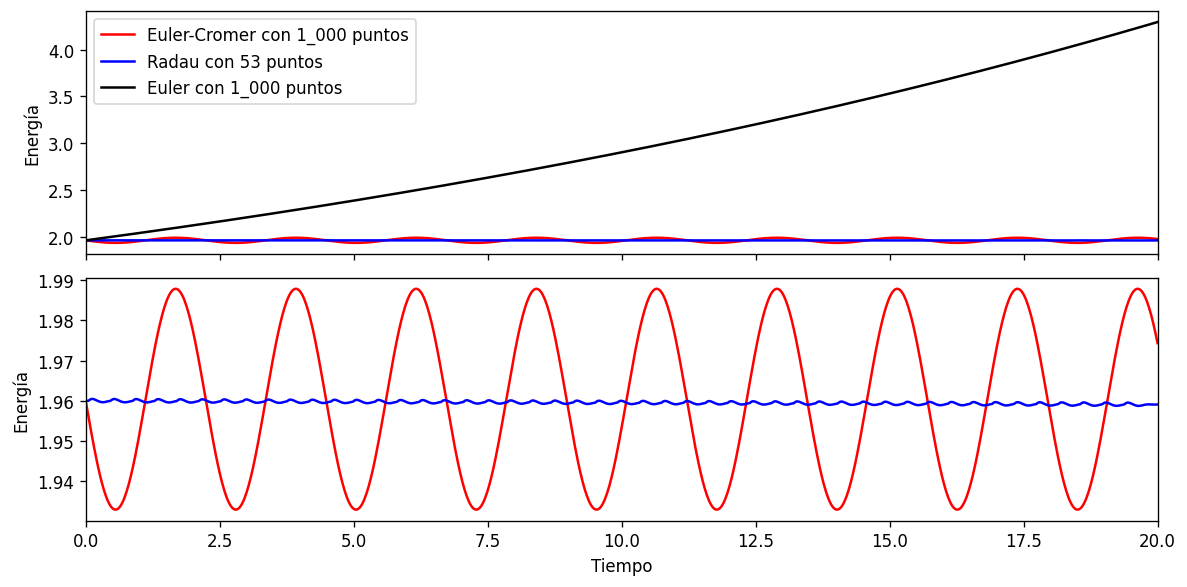

In [199]:
fig,ax = plt.subplots(2,figsize=(10,5),sharex=True)

for i in [0,1]:
    plt.sca(ax[i])
    plt.plot(ts2,vs**2+ω_0**2*xs**2,label=f"Euler-Cromer con {len(ts):_} puntos",c='r')
    plt.plot(t_dense,v_dense**2+x_dense**2*ω_0**2,label=f"{method} con {len(sol.t):_} puntos",c='b')
    if i==0: # Euler sólo va en el primer subplot
        plt.plot(ts,ys[:,1]**2+ω_0**2*ys[:,0]**2,label=f"Euler con {len(ts2):_} puntos",c='k')
        plt.legend()
    else:
        plt.xlabel("Tiempo")
    plt.ylabel("Energía")
    plt.margins(x=0)
plt.tight_layout()

# Ejemplos con eventos

## Péndulo

Ejemplo para hallar el período de un péndulo sin aproximación de ángulo pequeño, donde el sistema se ve como:

$$
\frac{d x}{d t} = v \qquad \frac{dv}{dt} = -\omega_0^2\sin(x)
$$

Usamos el "evento" definido por el cruce de la función de velocidad $\frac{dy}{dt}$ con el cero. Esto se implementa en scipy de la siguiente manera:

In [316]:
def pendulum(t,y,omega_0):
    x,v = y
    return np.array([v,-omega_0**2*np.sin(x)])
def pendulum_period(t,y,*args):
    """Queremos que esta función sea cero cuando el péndulo complete un período.
    Eso quiere decir que vuelva a tener velocidad cero"""
    x,v = y
    return v
# pero sólo nos importa cuando la velocidad se vuelve cero desde valores positivos
# para esto le ponemos el atributo `direction=-1` a nuestra función, para que sólo se active cuando la velocidad cruce el cero hacia los negativos
pendulum_period.direction = -1

In [317]:
y0 = np.array([
    np.deg2rad(70),
    0.
])
sol = solve_ivp(pendulum,t_span=(0,20),y0=y0,args=[ω_0],events=[pendulum_period],max_step=0.1)

Los tiempos donde nuestra función de eventos cruce el cero se encontrarán en el atributo `t_events` del objeto solucicón

In [318]:
t_eventos = sol.t_events[0]

Vemos que el período del péndulo real...

In [323]:
np.diff(t_eventos).mean()

np.float64(4.946414636389603)

...es diferente al período que tendría un péndulo simple con las mismas constantes

In [324]:
2*np.pi/ω_0

4.487989505128276

Text(0, 0.5, 'Posición')

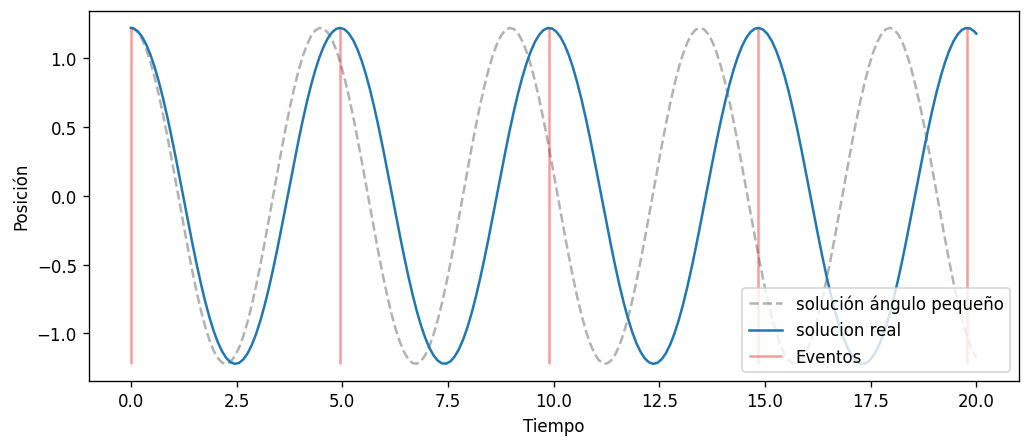

In [325]:
plt.plot(sol.t,y0[0]*np.cos(ω_0*sol.t),"--k",alpha=0.3,label = "solución ángulo pequeño")
plt.plot(sol.t,sol.y[0],label="solucion real")
plt.vlines(sol.t_events[0],-y0[0],y0[0],color='r',alpha=0.4,label="Eventos")
plt.legend(loc=4)
plt.xlabel("Tiempo")
plt.ylabel("Posición")

# Ejemplo pelota

Aquí se simula el rebote de una pelota elástica que cae desde $h=2$ metros, que pierde un porcentaje de su velocidad con cada rebote dado por el argumento `restore`, y que opcionalmente tiene un coeficiente de fricción aerodinámica `drag`.

Es posible modificar la variable de estado `y` dentro de la función que definimos para el evento, pero esto no está directamente soportado por scipy. Esto hará que el evento se detecte dos veces en este caso.

In [326]:
def ball(t,y,g,drag,restore):
    x,v = y
    return np.array([v,-g-drag*np.sign(v)*abs(v)])

def bounce(t,y,g,drag,restore):
    "Cada vez que esta función sea llamada por el algoritmo interno de solve_ivp, este código correrá, y se actualizará la velocidad si ocurre un rebote"
    if y[0]<0 and y[1]<0:
        y[1] = abs(y[1]) * restore
        y[0] = 0.#abs(y[0])
    return y[0]

In [327]:
y0 = np.array([2.,0.])
sol = solve_ivp(ball,t_span=(0,10),y0=y0,args=[9.8,0.05,0.9],max_step=0.01,events=bounce,method="Radau")

Como el evento se detectó dos veces, hacemos el promedio de ambos tiempos de detección, los pares y los impares:

In [328]:
t_events = (sol.t_events[0][0::2] + sol.t_events[0][1::2])/2

Text(0, 0.5, 'Altura')

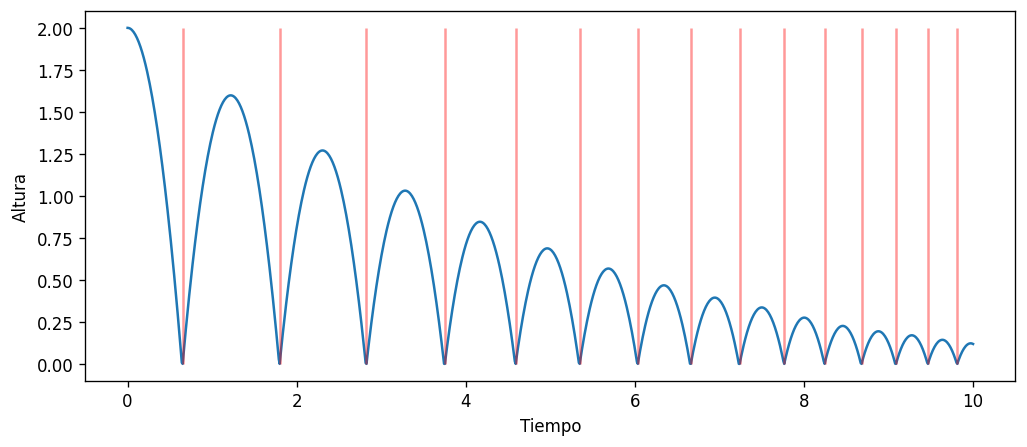

In [329]:
plt.plot(sol.t,sol.y[0])
plt.vlines(t_events,0,y0[0],color='r',alpha=0.4,label="eventos")
plt.xlabel("Tiempo")
plt.ylabel("Altura")